In [1]:
from utils.image_utils import plot_XY, gen_index_file
from unet.dataset import SegThorImagesDataset
import torch
from torch.utils.data import DataLoader
from unet.unet_model import UNet
from torch import optim

In [2]:
# if index file doesn't exist, generate and save 
index_file_train = gen_index_file()

Filename: data/train_patient_idx.csv already exists, skipping gen


In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. ")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead.")

GPU is not available, using CPU instead.


In [11]:
# define model
# define training loop 
train_dataset = SegThorImagesDataset() 
train_dl = DataLoader(train_dataset, batch_size=16, shuffle=True)
# todo: split this into train/validate

model = UNet(n_channels=1, n_classes=5) # 0: no-classification 1: organ, 2: organ, 3: organ, 4: organ

criterion = torch.nn.CrossEntropyLoss()  # or any other applicable loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5  # Number of epochs
model.to(device)

model.train()
epoch_loss = 0.0

iter_dl = iter(train_dl)

In [12]:
X, Y = next(iter_dl)



In [13]:
outputs = model(X)

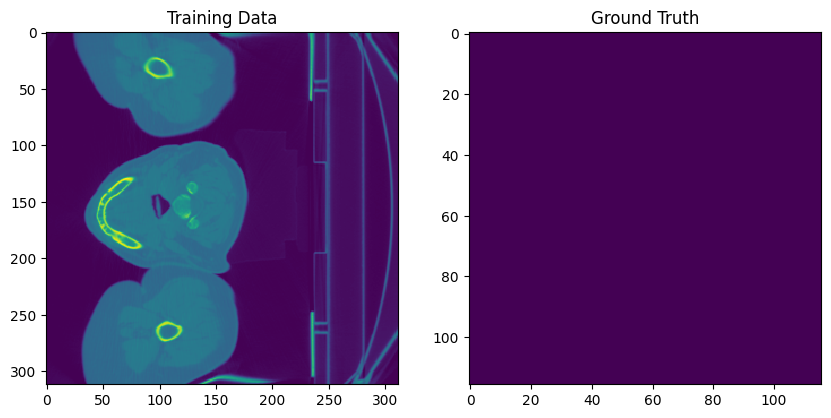

In [7]:
plot_XY(X[1, :, :, :], Y[1, :, :])

In [14]:
criterion = torch.nn.CrossEntropyLoss()  # or any other applicable loss function
criterion(outputs, Y.long())

tensor(1.3347, grad_fn=<NllLoss2DBackward0>)

In [15]:
# define model
# define training loop 
train_dataset = SegThorImagesDataset() # TODO: training img transforms
train_dl = DataLoader(train_dataset, batch_size=16, shuffle=True)
# todo: split this into train/validate

model = UNet(n_channels=1, n_classes=5) # 0: no-classification 1: organ, 2: organ, 3: organ, 4: organ
criterion = torch.nn.CrossEntropyLoss()  # or any other applicable loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5  # Number of epochs
model.to(device)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_dl:
        inputs = inputs.to(device)
        outputs = model(inputs)
        outputs = outputs.cpu()
        #predictions = torch.argmax(outputs, dim=1).float()
        loss = criterion(outputs, targets.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss -= loss.item()
        inputs.cpu()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_dl)}')

model.cpu()


Epoch 1, Loss: -0.3021801354138759
Epoch 2, Loss: -0.1218090489314034
Epoch 3, Loss: -0.08882040574600727
Epoch 4, Loss: -0.07257516952311813
Epoch 5, Loss: -0.057747880318041504


UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (down_sample): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=Tr

Opening: data/train/Patient_01/Patient_01.nii.gz
torch.Size([512, 512, 229]) torch.Size([512, 512, 229])


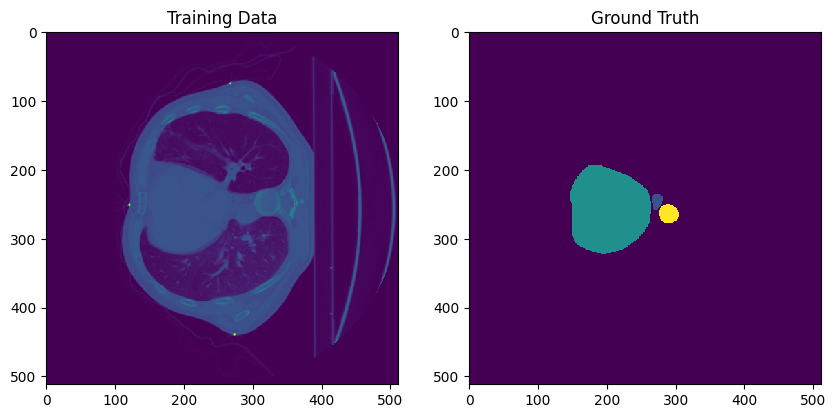

In [ ]:
from utils.image_utils import get_sample_data
 
x, y = get_sample_data(dir='train', patient_number=1, slice=0)
print(x.size(), y.size())

idx = 100

plot_XY(x[:, :, idx].unsqueeze(0), y[:, :, idx])